# Goal
1. To visualize car data for exploration.
2. To visualize the data about model evaluation. Examples include:
    1. Look at the variance in prediction per target variable (boxplot)


In [15]:
%matplotlib inline
import pandas as pd
from ggplot import *

In [5]:
cars = pd.read_csv('../data/imports-85.data')
cars.columns = [u'risk', u'normalizedLosses', u'make', u'fuelType', u'aspiration', u'numDoors',
       u'bodyStyle', u'driveWheels', u'engineLocation', u'wheelBase',
       u'length', u'width', u'height', u'curbWeight', u'engineType',
       u'numCylinders', u'engineSize', u'fuelSystem', u'bore', u'stroke',
       u'compressionRatio', u'horsepower', u'peakRPM', u'cityMPG', u'highwayMPG', u'price'] # add columns names

## Looking at the top 6 features by boost importance

In [6]:
cars[['engineType', 'fuelType', 'driveWheels', 'curbWeight', 'numDoors', 'wheelBase']].head()

,engineType,fuelType,driveWheels,curbWeight,numDoors,wheelBase
0,dohc,gas,rwd,2548,two,88.6
1,ohcv,gas,rwd,2823,two,94.5
2,ohc,gas,fwd,2337,four,99.8
3,ohc,gas,4wd,2824,four,99.4
4,ohc,gas,fwd,2507,two,99.8


## Visualizing

### Bar/Histogram Charts of Mean

I tried to use the `stat` param for geom_bar to use the value of risk rather than count. __*Didn't work*__
Found this [article](http://blog.yhat.com/posts/aggregating-and-plotting-time-series-in-python.html) that showed me to use weight (instead of __*y*__).

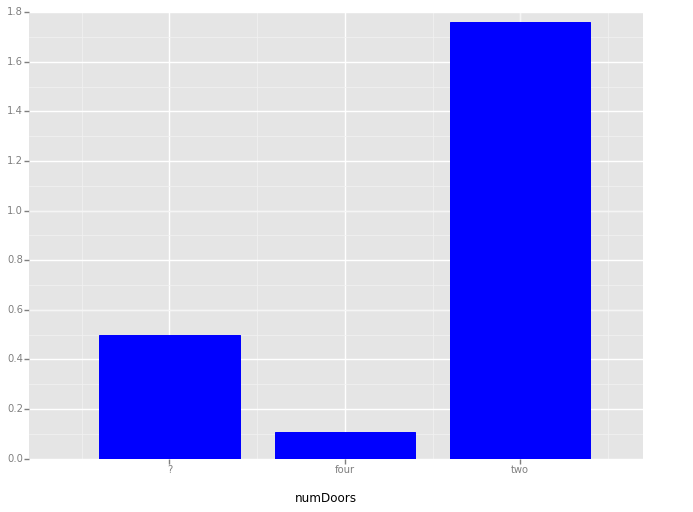

<ggplot: (19837244)>

In [90]:
groupDoors = cars.groupby('numDoors').mean()
groupDoors['numDoors'] = groupDoors.index
groupDoors = pd.DataFrame(groupDoors.to_dict())
ggplot(data=groupDoors, aesthetics=aes(x='numDoors', weight='risk')) + geom_bar(fill="blue") #Use identity to get the value of the y not the count. NOt working.

In [79]:
groupDoors.head()

,cityMPG,compressionRatio,curbWeight,engineSize,height,highwayMPG,length,numDoors,risk,wheelBase,width
?,30.000000,15.150000,2317.000000,110.000000,53.050000,36.000000,167.550000,?,0.500000,96.250000,65.150000
four,25.052632,10.661404,2648.043860,127.719298,54.910526,30.429825,178.393860,four,0.105263,101.154386,66.298246
two,25.375000,9.369545,2441.272727,126.204545,52.260227,31.090909,168.628409,two,1.761364,95.822727,65.439773


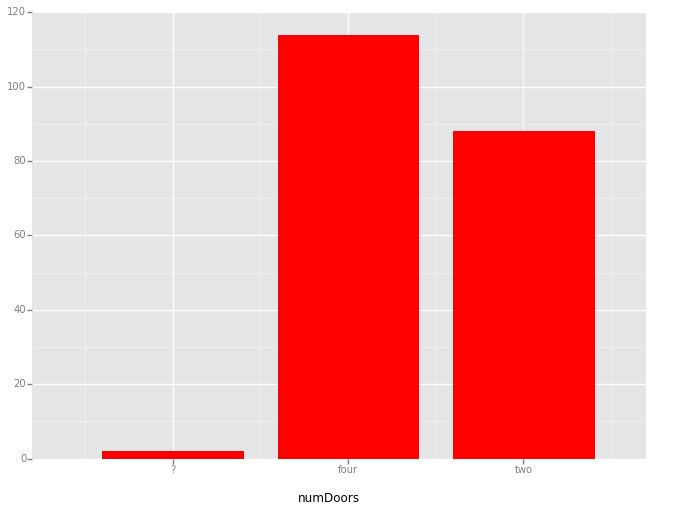

<ggplot: (19242142)>

In [91]:
ggplot(cars, aes(x='numDoors')) + geom_bar(fill='red')

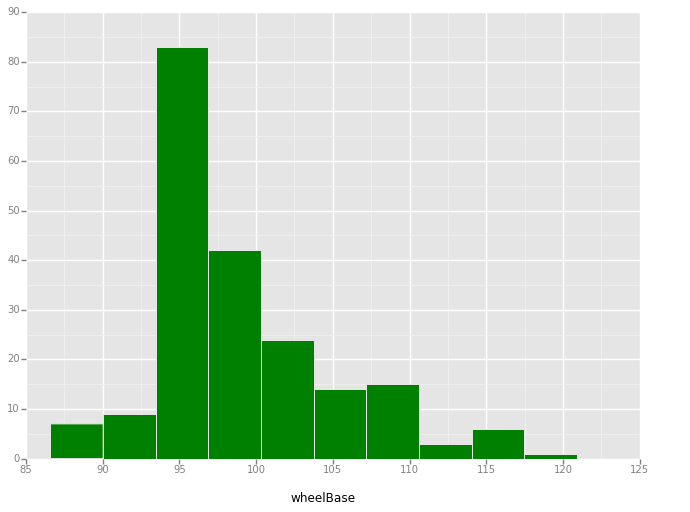

<ggplot: (20068963)>

In [92]:
ggplot(cars, aes(x='wheelBase')) + geom_histogram(fill='green')

## Summarizing

#### Grouping
You can apply aggregates and they automatically calculate for numeric columns

In [49]:
## Get frequency by number of does
cars[['numDoors', 'risk']].groupby('numDoors').count()

,risk
numDoors,
?,2
four,114
two,88


In [45]:
## Get mean by number of doors
cars.groupby('numDoors').mean()

,risk,wheelBase,length,width,height,curbWeight,engineSize,compressionRatio,cityMPG,highwayMPG
numDoors,,,,,,,,,,
?,0.500000,96.250000,167.550000,65.150000,53.050000,2317.000000,110.000000,15.150000,30.000000,36.000000
four,0.105263,101.154386,178.393860,66.298246,54.910526,2648.043860,127.719298,10.661404,25.052632,30.429825
two,1.761364,95.822727,168.628409,65.439773,52.260227,2441.272727,126.204545,9.369545,25.375000,31.090909


In [61]:
cars.groupby('numDoors').mean().index

Index([u'?', u'four', u'two'], dtype='object', name=u'numDoors')

In [50]:
## Get statistical summary per 
cars.groupby('numDoors').describe()

cityMPG  compressionRatio   curbWeight  engineSize  \
numDoors                                                                
?        count    2.000000          2.000000     2.000000    2.000000   
         mean    30.000000         15.150000  2317.000000  110.000000   
         std      8.485281         10.677312   178.190909   16.970563   
         min     24.000000          7.600000  2191.000000   98.000000   
         25%     27.000000         11.375000  2254.000000  104.000000   
         50%     30.000000         15.150000  2317.000000  110.000000   
         75%     33.000000         18.925000  2380.000000  116.000000   
         max     36.000000         22.700000  2443.000000  122.000000   
four     count  114.000000        114.000000   114.000000  114.000000   
         mean    25.052632         10.661404  2648.043860  127.719298   
         std      5.703348          4.618039   525.366545   37.967035   
         min     14.000000          7.000000  1909.000000   90.000000   
         25%     20.000000          8.500000  2276.250000  108.000000   
         50%     25.000000          9.000000  2472.500000  120.000000   
         75%     29.750000          9.400000  3058.750000  141.000000   
         max     38.000000         23.000000  4066.000000  308.000000   
two      count   88.000000         88.000000    88.000000   88.000000   
         mean    25.375000          9.369545  2441.272727  126.204545   
         std      7.515979          2.536915   501.110875   46.717827   
         min     13.000000          7.000000  1488.000000   61.000000   
         25%     19.000000          8.700000  2014.750000   92.000000   
         50%     24.000000          9.200000  2375.000000  109.500000   
         75%     31.000000          9.400000  2783.500000  147.250000   
         max     49.000000         23.000000  3950.000000  326.000000   

                    height  highwayMPG      length        risk   wheelBase  \
numDoors                                                                     
?        count    2.000000    2.000000    2.000000    2.000000    2.000000   
         mean    53.050000   36.000000  167.550000    0.500000   96.250000   
         std      3.464823    8.485281   14.495689    0.707107    3.606245   
         min     50.600000   30.000000  157.300000    0.000000   93.700000   
         25%     51.825000   33.000000  162.425000    0.250000   94.975000   
         50%     53.050000   36.000000  167.550000    0.500000   96.250000   
         75%     54.275000   39.000000  172.675000    0.750000   97.525000   
         max     55.500000   42.000000  177.800000    1.000000   98.800000   
four     count  114.000000  114.000000  114.000000  114.000000  114.000000   
         mean    54.910526   30.429825  178.393860    0.105263  101.154386   
         std      2.088628    6.427223   11.596843    0.905914    6.288044   
         min     50.600000   16.000000  155.900000   -2.000000   93.100000   
         25%     53.600000   25.000000  171.700000    0.000000   96.300000   
         50%     55.000000   31.000000  175.600000    0.000000   99.100000   
         75%     56.100000   34.000000  187.800000    1.000000  104.800000   
         max     59.800000   47.000000  208.100000    2.000000  120.900000   
two      count   88.000000   88.000000   88.000000   88.000000   88.000000   
         mean    52.260227   31.090909  168.628409    1.761364   95.822727   
         std      1.973651    7.461220   11.138449    0.970772    3.993982   
         min     47.800000   16.000000  141.100000    0.000000   86.600000   
         25%     50.800000   25.000000  159.000000    1.000000   93.700000   
         50%     52.000000   30.000000  168.950000    2.000000   95.300000   
         75%     53.700000   37.000000  176.200000    3.000000   98.400000   
         max     56.100000   54.000000  199.200000    3.000000  112.000000   

                     width  
numDoors                    
?        count    2.000000  
    

## Correlations

In [52]:
cars[['risk', 'engineType', 'fuelType', 'driveWheels', 'curbWeight', 'numDoors', 'wheelBase']].corr()

,risk,curbWeight,wheelBase
risk,1.000000,-0.229281,-0.525095
curbWeight,-0.229281,1.000000,0.781763
wheelBase,-0.525095,0.781763,1.000000
